# Hoe is de wereldbevolking veranderd sinds 1955?

- In welk jaar was de grootste stijging?
- Wanneer was de laagste stijging?
- Op welk continent groeide de populatie het hardst?
- Is er een verband tussen de afname van de bevolkingsgroei en de verstedelijking?
- Is er een rede voor de daling/stijging?
- Conclusie
- Bronvermedling

In [1628]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Globaal overzicht van de wereldpopulatie na 2015

Hieronder een kaart van de wereld met daarop een overzicht van de bevolkingsdichtheid.

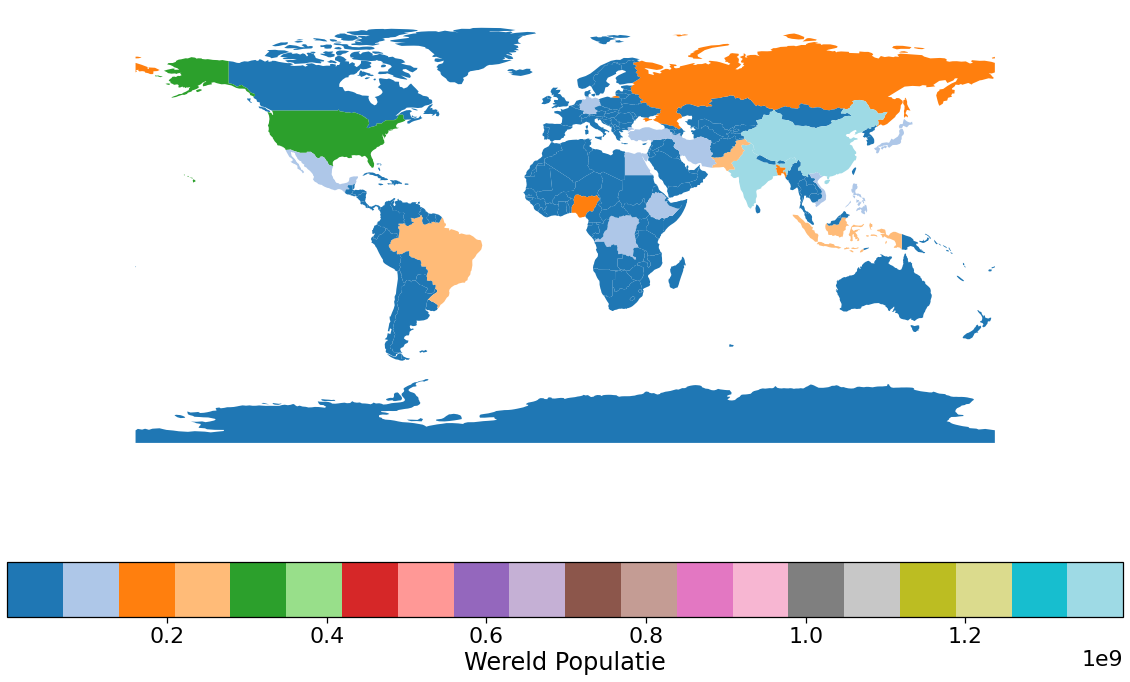

In [1629]:
import geopandas as gpd
# Data inladen van geopandas
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# Wereldpopulatie plotten
ax = world.plot(column="pop_est"                             ,
                cmap="tab20"                                 ,
                figsize=(20,12)                              ,
                legend=True                                  , 
                legend_kwds={'label': "Wereld Populatie"     ,
                             'orientation': "horizontal"})
ax.set_axis_off()

## De data inladen.

Alle dataframes die gebruikt worden.

In [1630]:
Afrika          = pd.read_csv('Africa_population.csv'       , 
                                encoding= 'unicode_escape'  ,
                                thousands=r','              , 
                                sep=",")
Azië            = pd.read_csv('Asia_population.csv'         ,
                                encoding= 'unicode_escape'  ,
                                thousands=r','              , 
                                sep=",")
Australië       = pd.read_csv('Australia_population.csv'    , 
                                encoding= 'unicode_escape'  ,
                                thousands=r','              , 
                                sep=",")
Europa          = pd.read_csv('Europe_population.csv'       ,
                                encoding= 'unicode_escape'  ,
                                thousands=r','              ,
                                sep=",")
Noord_Amerika   = pd.read_csv('North_America_population.csv', 
                                encoding= 'unicode_escape'  ,
                                thousands=r','              ,
                                sep=",")
Zuid_Amerika    = pd.read_csv('South_America_population.csv', 
                                encoding= 'unicode_escape'  ,  
                                thousands=r','              ,
                                sep=",")


## Data cleaning

De onderstaande csv's worden aangepast ter behoeve van verder gebruik.

Data voor Afrika

In [1631]:
# Nieuwe kolom
Afrika.insert(0, "Continent", "Africa")
# Hernoemen kolom
Afrika.columns.values[3]    = "Yearly Population Growth %"
Afrika.columns.values[4]    = "Yearly Population Growth"
Afrika.columns.values[8]    = "Density (P/Km²)"
Afrika.columns.values[11]   = "Share of World Population %"
Afrika.columns.values[13]   = "Rank in World Population"

Data voor Azië

In [1632]:
# Nieuwe kolom
Azië.insert(0, "Continent", "Asia")
# Hernoemen kolom
Azië.columns.values[3]      = "Yearly Population Growth %"
Azië.columns.values[4]      = "Yearly Population Growth"
Azië.columns.values[8]      = "Density (P/Km²)"
Azië.columns.values[11]     = "Share of World Population %"
Azië.columns.values[13]     = "Rank in World Population"

Data voor Australië

In [1633]:
# Nieuwe kolom
Australië.insert(0, "Continent", "Australia")
# Hernoemen kolom
Australië.columns.values[3]     = "Yearly Population Growth %"
Australië.columns.values[4]     = "Yearly Population Growth"
Australië.columns.values[11]    = "Share of World Population %"
Australië.columns.values[13]    = "Rank in World Population"

Data voor Europa


In [1634]:
# Nieuwe kolom
Europa.insert(0, "Continent", "Europe")
# Hernoemen kolom
Europa.columns.values[3]    = "Yearly Population Growth %"
Europa.columns.values[4]    = "Yearly Population Growth"
Europa.columns.values[11]   = "Share of World Population %"
Europa.columns.values[13]   = "Rank in World Population"

Data voor Noord Amerika

In [1635]:
# Nieuwe kolom
Noord_Amerika.insert(0, "Continent", "North America")
# Hernoemen kolom
Noord_Amerika.columns.values[3]     = "Yearly Population Growth %"
Noord_Amerika.columns.values[4]     = "Yearly Population Growth"
Noord_Amerika.columns.values[11]    = "Share of World Population %"
Noord_Amerika.columns.values[13]    = "Rank in World Population"

Data voor Zuid Amerika

In [1636]:
# Nieuwe kolom
Zuid_Amerika.insert(0, "Continent", "South America")
# Hernoemen kolom
Zuid_Amerika.columns.values[3]      = "Yearly Population Growth %"
Zuid_Amerika.columns.values[4]      = "Yearly Population Growth"
Zuid_Amerika.columns.values[11]     = "Share of World Population %"
Zuid_Amerika.columns.values[13]     = "Rank in World Population"

## Dataframes samenvoegen en percentages herberekenen

Bij de controle bleek dat de percentages niet juist waren berekend. Hieronder volgt de verbetering, nadat ze worden samengevoegd tot één dataframe.

In [1637]:
# Dataframes samenvoegen
samen = [Zuid_Amerika   , 
        Noord_Amerika   , 
        Europa          , 
        Afrika          , 
        Australië       , 
        Azië]
Wereld = pd.concat(samen,
                   ignore_index=True)
# Herberekening van percentages
Wereld["Yearly Population Growth %"]    = Wereld['Yearly Population Growth'].div(Wereld['Population']).multiply(100)
Wereld["Urban Population %"]            = Wereld['Urban Population'].div(Wereld['Population']).multiply(100)
Wereld["Share of World Population %"]   = Wereld['Population'].div(Wereld['World Population']).multiply(100)
# Controle
Wereld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Continent                    109 non-null    object 
 1   Year                         109 non-null    int64  
 2   Population                   109 non-null    int64  
 3   Yearly Population Growth %   109 non-null    float64
 4   Yearly Population Growth     109 non-null    int64  
 5   Net Migrants                 109 non-null    int64  
 6   Median Age                   109 non-null    float64
 7   Fertility Rate               109 non-null    float64
 8   Density (P/Km²)              109 non-null    int64  
 9   Urban Population %           109 non-null    float64
 10  Urban Population             109 non-null    int64  
 11  Share of World Population %  109 non-null    float64
 12  World Population             109 non-null    int64  
 13  Rank in World Popula

Migratie en ranking worden niet gebruikt deze worden verwijderd.

In [1638]:
# Drop onnodige kolommen
Wereld = Wereld.drop('Net Migrants', axis=1)
Wereld = Wereld.drop('Rank in World Population', axis=1)
# Controle
Wereld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Continent                    109 non-null    object 
 1   Year                         109 non-null    int64  
 2   Population                   109 non-null    int64  
 3   Yearly Population Growth %   109 non-null    float64
 4   Yearly Population Growth     109 non-null    int64  
 5   Median Age                   109 non-null    float64
 6   Fertility Rate               109 non-null    float64
 7   Density (P/Km²)              109 non-null    int64  
 8   Urban Population %           109 non-null    float64
 9   Urban Population             109 non-null    int64  
 10  Share of World Population %  109 non-null    float64
 11  World Population             109 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ KB


## In welk jaar was de grootste stijging?

Om deze vraag te beantwoorden wordt voor elk jaar gekeken wat de gemiddelde populatiegroei is. Vervolgens wordt dit weergegeven in een lijngrafiek.

(1955.0, 2020.0)

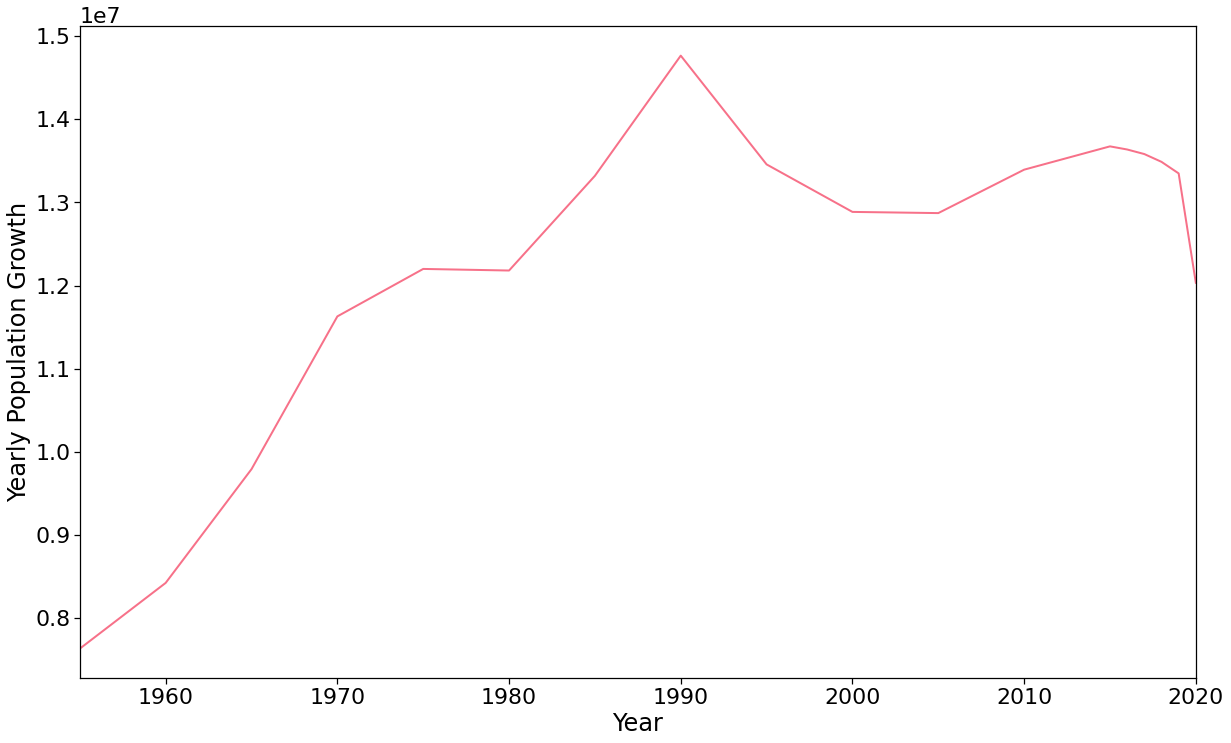

In [1639]:
# Gemiddelde stijging per jaar
Stijging = Wereld.groupby("Year")[["Yearly Population Growth"]].mean()
# grafiek
plt.figure(figsize=(20,12))
sns.set_palette("husl")
ax = sns.lineplot(data=Stijging          , 
             x="Year"                    ,
             y="Yearly Population Growth")
ax.set_xlim([1955, 2020])

De grootste stijging was in 1990.

## Wanneer was de laagste stijging?

Om de verschillen in stijging van de populatie inzichtelijker te maken volgt hieronder de weergave van de lijngrafiek in een dataframe gesorteerd van laag naar hoog op jaargemiddelde.

In [1640]:
# Gemiddelde stijging per jaar gesorteerd van laag naar hoog
Lstijging = Wereld.groupby("Year")[["Yearly Population Growth %"]].mean()
Lstijging.sort_values(by="Yearly Population Growth %", 
                     ascending=True)

,Yearly Population Growth %
Year,
2020,1.002882
2019,1.040406
2018,1.067245
2017,1.091558
2016,1.113784
2015,1.139850
2005,1.183242
2010,1.229827
2000,1.257165


De laagste stijging was in 2020.


## Op welk continent groeide de populatie het hardst?

Gegroepeerd per continent en jaarlijkse procentuele groei volgt hier een lijngrafiek. Hieruit is af te lezen op welk continent de populatie het meest toeneemt.


(1955.0, 2020.0)

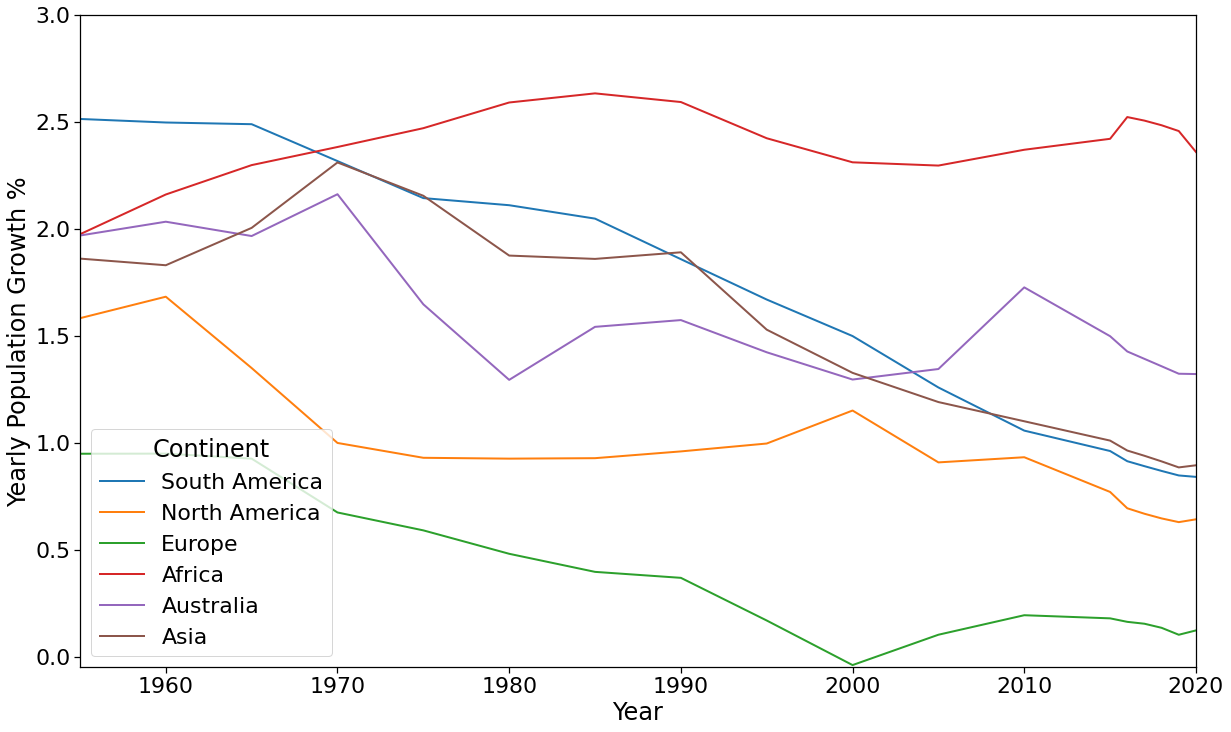

In [1641]:
# Per continent gemiddelde stijging in percentages
Snelstgroeiende = Wereld.groupby("Continent")[["Yearly Population Growth %"]].mean()
Snelstgroeiende.sort_values(by="Yearly Population Growth %", 
                            ascending=False)
plt.figure(figsize=(20,12))

ax = sns.lineplot(x="Year"      , 
             y="Yearly Population Growth %",
             data=Wereld        , 
             hue="Continent",
             palette="tab10")
ax.set_ylim([-0.05, 3])
ax.set_xlim([1955, 2020])

In Afrika groeide de populatie het hardst na 1970, daarvoor was de groei het grootst in Zuid Amerika.

## Is er een verband tussen de afname van de bevolkingsgroei en de verstedelijking?

Om dit aan te tonen wordt hieronder de procentuele verstedelijking met de procentuele jaarlijkse populatietoename en bevolkingsdichtheid per vierkante kilometer vergeleken.

Text(0.5, 0.98, 'Verband tussen verstedelijking en bevolkingsgroei')

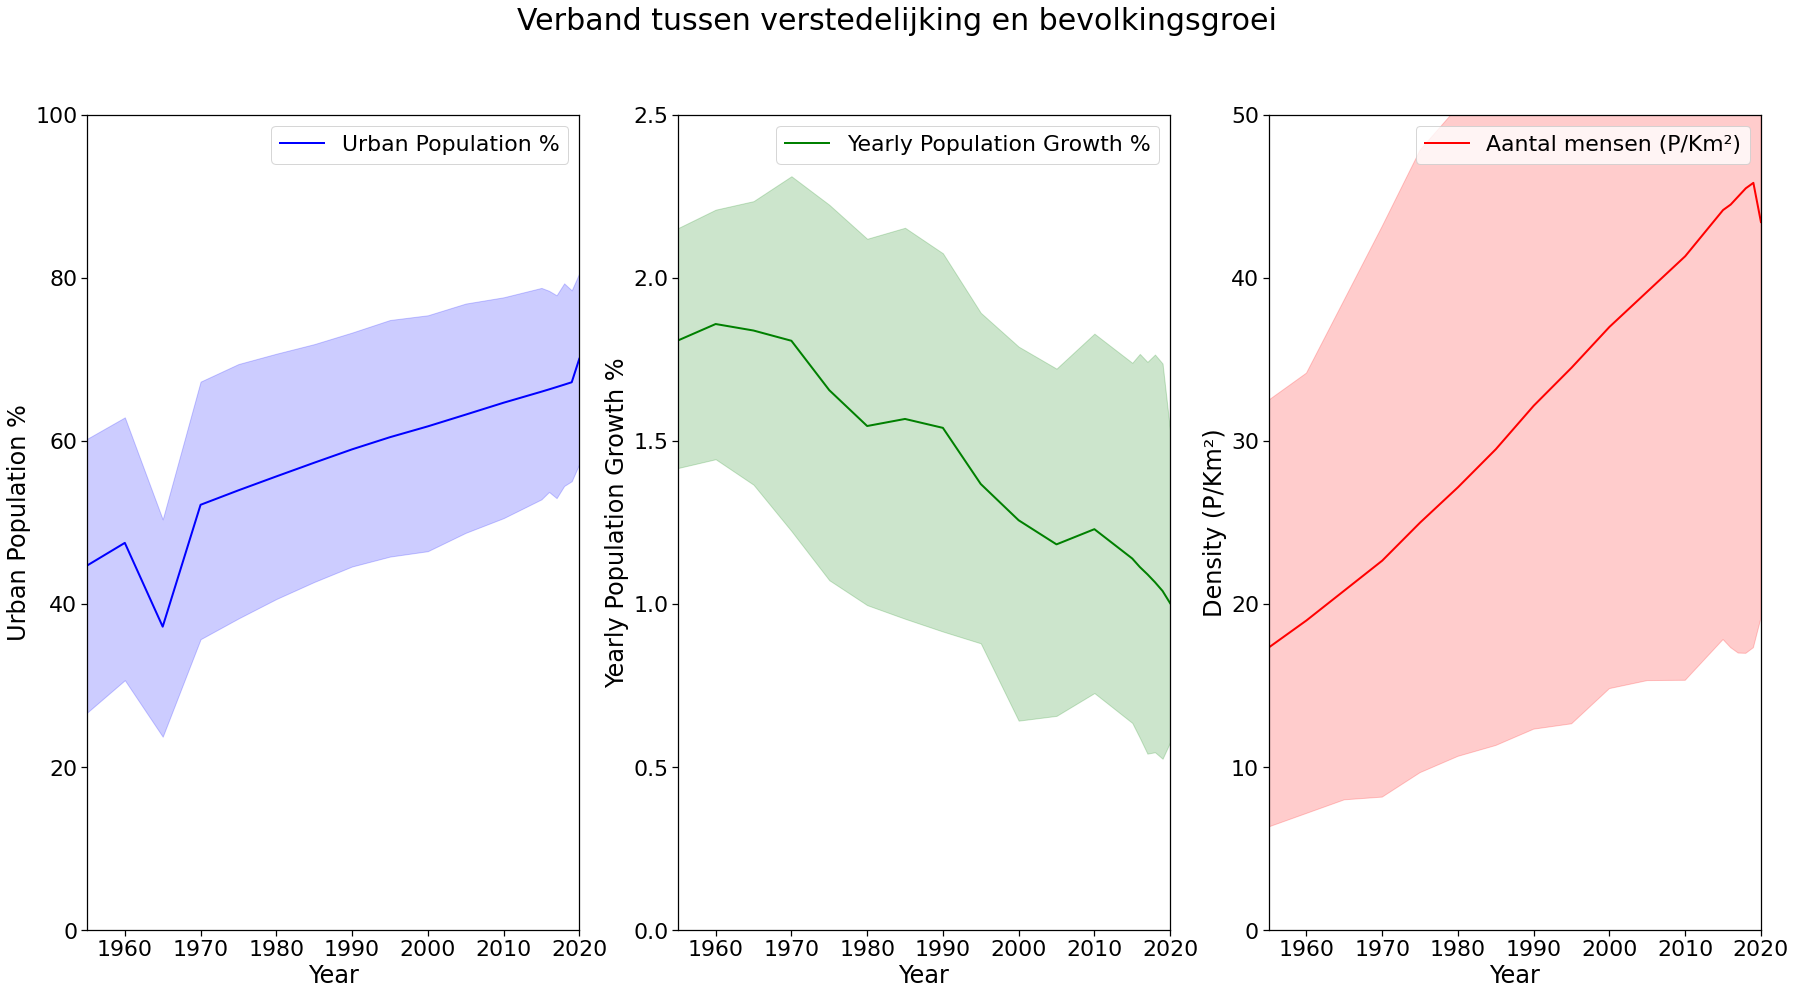

In [1642]:
# Grafieken
fig,ax = plt.subplots(figsize=(30, 15))
sns.despine()
sns.set_context("notebook"              , 
                font_scale=2            , 
                rc={"lines.linewidth": 2})
plt.subplot(1, 3, 1)
ax1=sns.lineplot(x="Year"               , 
                 y="Urban Population %" , 
                 data=Wereld            , 
                 color="blue"           ,
                 label = 'Urban Population %')
plt.subplot(1, 3, 2)
ax2=sns.lineplot(x="Year"                           , 
                 y="Yearly Population Growth %"     , 
                 data=Wereld                        , 
                 color="green"                      ,
                 label = 'Yearly Population Growth %')
plt.subplot(1, 3, 3)
ax3=sns.lineplot(x="Year"               , 
                 y="Density (P/Km²)"    , 
                 data=Wereld            , 
                 color="red"            ,
                 label = "Aantal mensen (P/Km²)")

ax1.set_ylim([0, 100])
ax1.set_xlim([1955, 2020])
ax2.set_ylim([0, 2.5])
ax2.set_xlim([1955, 2020])
ax3.set_ylim([0, 50])
ax3.set_xlim([1955, 2020])
fig.suptitle("Verband tussen verstedelijking en bevolkingsgroei", 
             fontsize=30)

Uit de plots kan je herleiden dat hoe meer mensen in de steden gaan wonen en relatief dichter op elkaar hoe minder de populatie groeit.

## Is er een rede voor de daling/stijging? 

We zien dat de verstedelijking invloed heeft op de groei van de populatie. Misschien zijn er nog andere oorzaken? Zijn de mensen misschien ouder, is er sprake van vergrijzing? Worden er minder kinderen geboren?

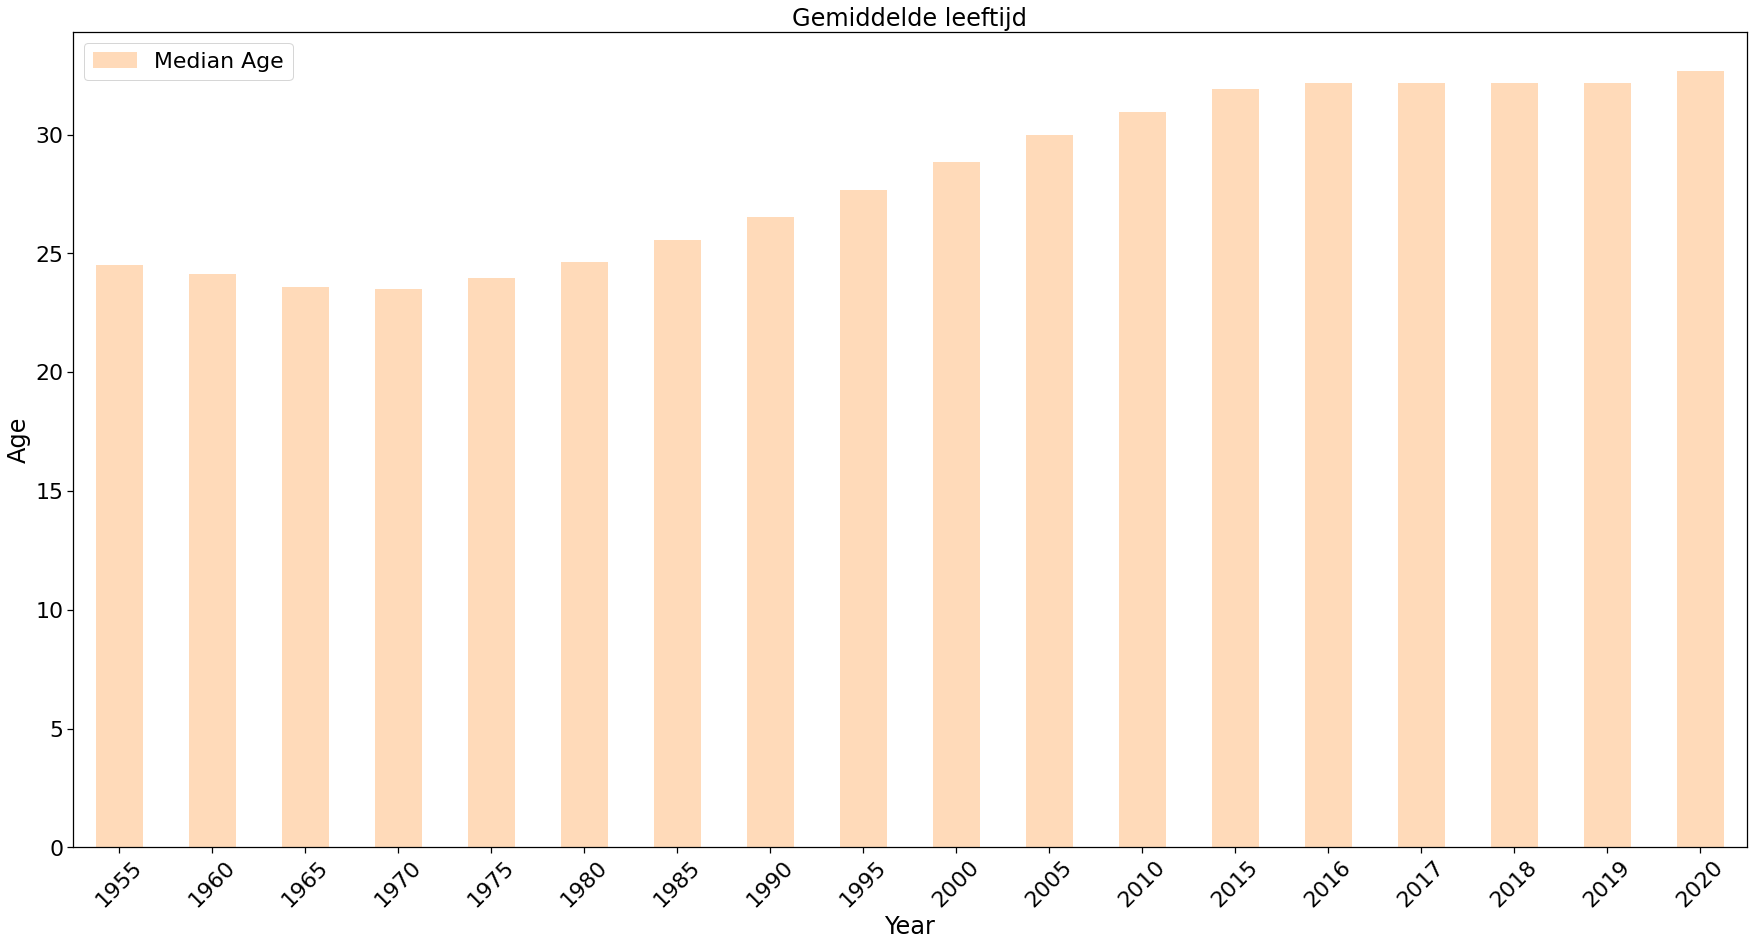

In [1643]:
# Gemiddelde leeftijd per jaar
df = Wereld.groupby("Year")[["Median Age"]].mean()
# Grafiek
color="peachpuff"
ax = df.plot.bar(figsize=(30, 15), color=color)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Age")
plt.title("Gemiddelde leeftijd")
plt.show()

De bevolking is gemiddeld ouder dan vroeger.

Misschien krijgen ze minder kinderen?

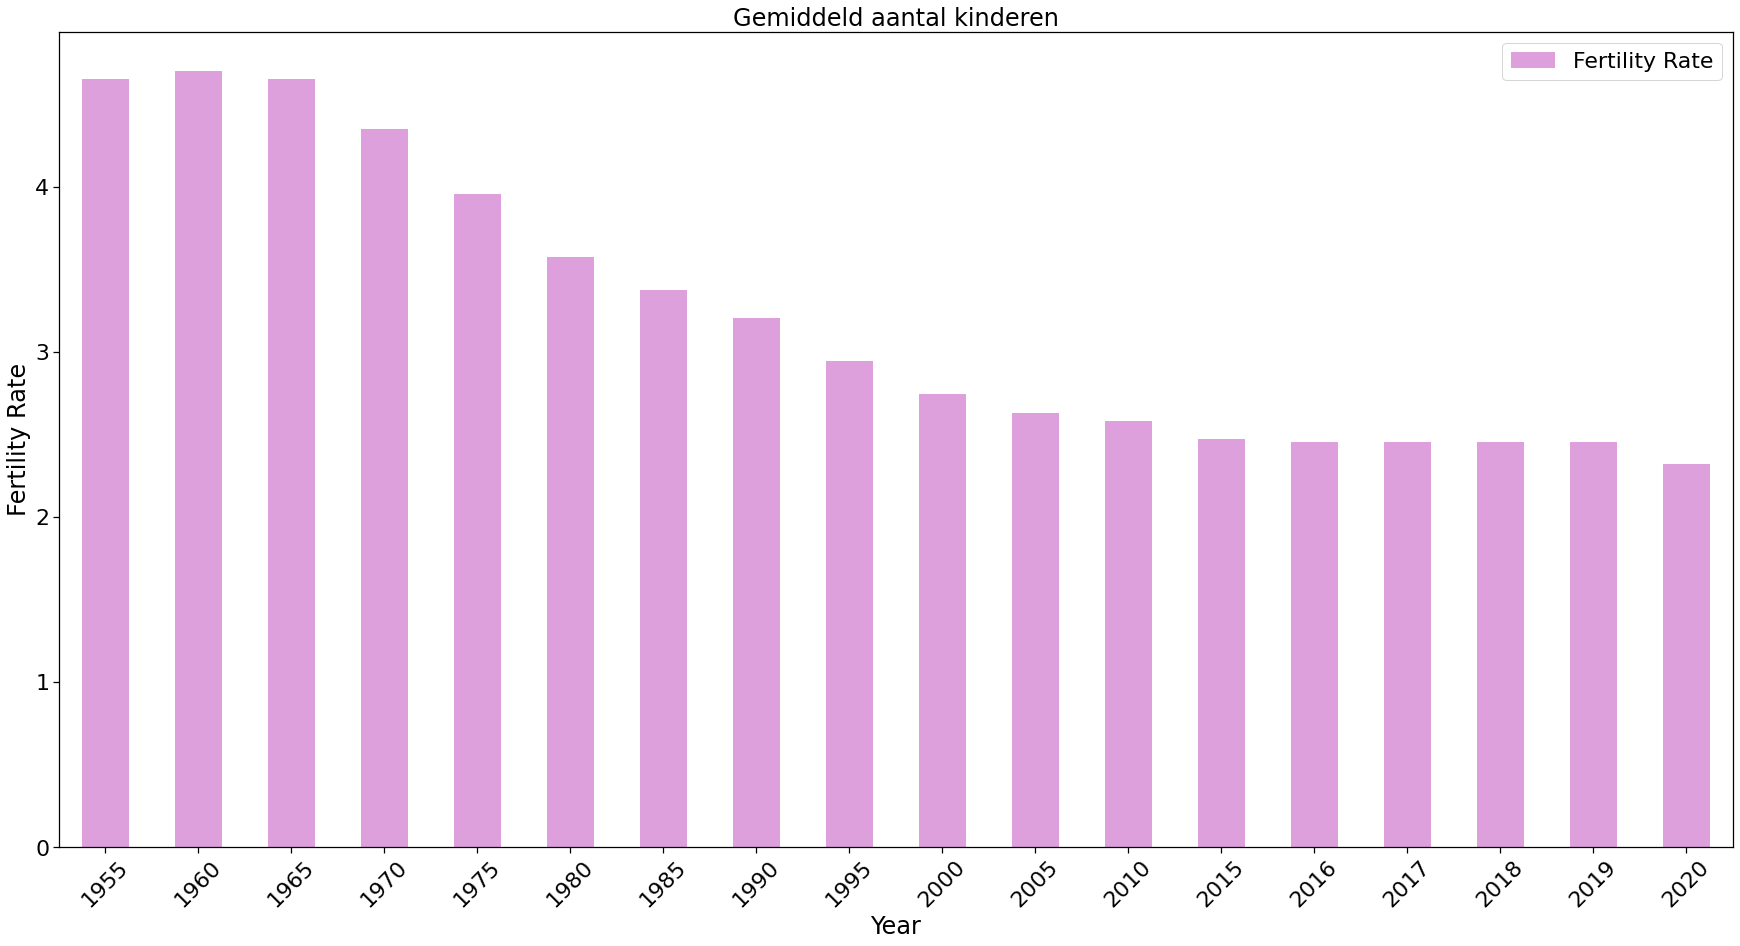

In [1644]:
# Gemiddeld aantal geboortes per vrouw
df2 = Wereld.groupby("Year")[["Fertility Rate"]].mean()
# Grafiek
color="plum"
ax = df2.plot.bar(figsize=(30, 15), color=color)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.title("Gemiddeld aantal kinderen")
plt.show()

Het aantal kinderen per vrouw neemt af.

## Conclusie

De wereldbevolking is sinds 1955 ouder en woont dichter op elkaar. De bevolkingsgroei neemt daardoor af en er worden minder kinderen geboren. Hoewel de meeste mensen in Azië wonen, groeit de bevolking in Afrika het hardst. In Europa groeit de bevolking het minst en was de groei in het jaar 2000 zelfs negatief.

In antwoord op de hoofdvraag; 
De wereldbevolking is toegenomen maar de groei remt af, de mensen wonen steeds dichter bij elkaar, zijn gemiddeld ouder en krijgen minder kinderen.

Bronvermelding:

https://www.kaggle.com/datasets/amritharj/population-of-all-continents-19552020?select=south+america+population.csv